In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('Cleaned_Data.csv')

In [66]:
df1_athletics_men = df1[(df1['Sport'] == 'Athletics') & (df1['Sex'] == 0.0)]
df1_athletics_men = df1_athletics_men.drop(columns = ['Sport', 'Unnamed: 0', 'ID', 'Name'])
df1_athletics_men = pd.concat([df1_athletics_men, pd.get_dummies(df1_athletics_men['NOC'])], axis=1)
df1_athletics_men = df1_athletics_men.drop(columns = ['NOC'])


In [67]:
X_train = df1_athletics_men[df1_athletics_men['Year']<2016].drop(columns=['Winner', 'Year'])
X_test = df1_athletics_men[df1_athletics_men['Year']==2016].drop(columns=['Winner', 'Year'])
y_train = df1_athletics_men[df1_athletics_men['Year']<2016]['Winner']
y_test = df1_athletics_men[df1_athletics_men['Year']==2016]['Winner']

In [68]:
X_train.head()

,Sex,Age,Height,Weight,AFG,AHO,ALB,ALG,AND,ANG,...,VEN,VIE,VIN,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
27,0.0,31.0,189.0,130.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0.0,24.0,174.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0.0,23.0,180.0,71.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0.0,30.0,187.0,76.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0.0,22.0,177.0,74.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_test

,Sex,Age,Height,Weight,Year
90,0.0,26.0,170.0,65.0,2016.0
168,0.0,20.0,175.0,66.0,2016.0
348,0.0,27.0,176.0,56.0,2016.0
382,1.0,17.0,147.0,50.0,2016.0
557,0.0,30.0,184.0,85.0,2016.0
...,...,...,...,...,...
62677,1.0,25.0,183.0,104.0,2016.0
62739,0.0,25.0,200.0,130.0,2016.0
62757,1.0,26.0,166.0,53.0,2016.0
62852,1.0,26.0,168.0,60.0,2016.0


In [54]:
y_test

90       0.0
168      0.0
348      0.0
382      0.0
557      0.0
        ... 
62677    0.0
62739    0.0
62757    0.0
62852    0.0
63162    0.0
Name: Winner, Length: 798, dtype: float64

In [9]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

In [10]:
# rf.fit(X_train, y_train)
# prediction = rf.predict(X_test)

In [11]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       734
         1.0       0.33      0.08      0.13        64

    accuracy                           0.91       798
   macro avg       0.63      0.53      0.54       798
weighted avg       0.88      0.91      0.89       798



In [10]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import shap

# explainer = shap.TreeExplainer(rf) #, feature_perturbation = 'interventional')

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9786 entries, 11 to 63663
Columns: 224 entries, Sex to ZIM
dtypes: float64(5), uint8(219)
memory usage: 2.5 MB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 90 to 63162
Columns: 224 entries, Sex to ZIM
dtypes: float64(5), uint8(219)
memory usage: 208.1 KB


In [37]:
#shap_values = explainer.shap_values(X_train)

Exception: ignored

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [70]:
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [71]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

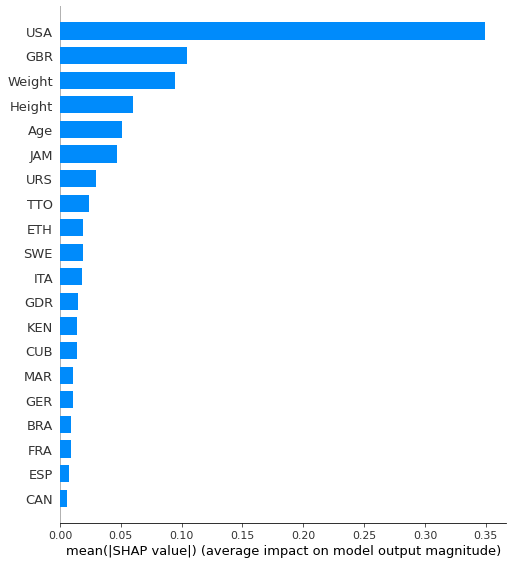

In [83]:
import matplotlib.pyplot as plt
plt = shap.summary_plot(shap_values, X_test, plot_type='bar')


In [77]:
plt.savefig('athletes_men.png')

AttributeError: ignored

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       734
         1.0       0.43      0.09      0.15        64

    accuracy                           0.92       798
   macro avg       0.68      0.54      0.56       798
weighted avg       0.89      0.92      0.89       798

